# **MyUMKM Chatbot ( Long Short Term Memory Algorithm )**


According to S. Sannikova (2018), a **chatbot** is a computer program that simulates human conversation or chatting through artificial intelligence.

**Stages of Chatbot Creation** :

1.   Importing Libraries
2.   Loading Dataset
3.   Data Processing
4.   Formulating Input Length, Output Length, and Vocabulary
5.   Creating LSTM Model
6.   Evaluating the Model
7.   Testing the Chatbot
8.   Saving the Model



**Download Dataset From G-Drive**

In [1]:
!gdown 15C2vMl_hqhc7jWAonHwmr5zW00c2WIrM #download dataset

Downloading...
From: https://drive.google.com/uc?id=15C2vMl_hqhc7jWAonHwmr5zW00c2WIrM
To: /content/umkm.json
100% 1.04M/1.04M [00:00<00:00, 29.0MB/s]


**The first step in creating chatbot features is to import all the libraries that will be used.**

In [2]:
# Import libraries and modules

# JSON is used for working with JSON data
import json  # (Functions: load, dump, loads, dumps)

# NLTK (Natural Language Toolkit) is used for natural language processing
import nltk  # (Functions: download, stem, lemmatize, tokenize, etc.)
from nltk.stem import WordNetLemmatizer

# The time module is used for time management
import time  # (Functions: time, sleep, etc.)

# The random module is used for generating random numbers
import random  # (Functions: random, shuffle, choice, etc.)

# The string module contains string processing functions
import string  # (Functions: punctuation, ascii_letters, digits, etc.)

# The pickle module is used for object serialization in Python
import pickle  # (Functions: dump, load, dumps, loads, etc.)

# NumPy is a library for numerical computations using arrays
import numpy as np

# Pandas is used for data analysis and manipulation
import pandas as pd  # (Functions: DataFrame, read_csv, read_json, etc.)

# BytesIO provides a byte buffer in memory
from io import BytesIO

# TensorFlow is a machine learning and artificial intelligence library
import tensorflow as tf  # (Functions: keras, constant, Session, etc.)

# IPython.display is used for displaying objects in IPython
import IPython.display as ipd  # (Functions: Audio, Image, HTML, display, etc.)

# Matplotlib is used for creating visualization plots
import matplotlib.pyplot as plt  # (Functions: plot, show, xlabel, ylabel, etc.)

# Specific Keras functions
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten, Dense, GlobalMaxPool1D

# LabelEncoder is used to encode class labels
from sklearn.preprocessing import LabelEncoder

# Module for splitting training and test data
from sklearn.model_selection import train_test_split


**Download NLTK Package**

In [3]:
# Package for sentence tokenizer
nltk.download('punkt')  # Download the Punkt tokenizer models

# Package for lemmatization
nltk.download('wordnet')  # Download WordNet lexical database for lemmatization

# Package for multilingual WordNet data
nltk.download('omw-1.4')  # Download the Open Multilingual Wordnet data


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Load Dataset JSON**

After importing the libraries, the next step is to load the provided dataset. The dataset is in the **.json** format, which is well-suited for creating a Chatbot model.

JSON data is considered semi-structured, containing various parts such as **tag**, **pattern**, **context**, and **response**.

In [4]:
# Importing the dataset from a JSON file named 'umkm.json'
with open('umkm.json') as content:
    dataset = json.load(content)

In [5]:
# Getting all data into lists
tags = []  # Data tags
inputs = []  # Data inputs or patterns
responses = {}  # Data responses
words = []  # Data words
classes = []  # Data classes or tags
documents = []  # Data document sentences
ignore_words = ['?', '!']  # Ignore special characters
# Add intents data from JSON
for intent in dataset['intents']:
    responses[intent['tag']] = intent['responses']
    for lines in intent['patterns']:
        inputs.append(lines)
        tags.append(intent['tag'])
        # Used for patterns or text questions in JSON
        for pattern in intent['patterns']:
            w = nltk.word_tokenize(pattern)
            words.extend(w)
            documents.append((w, intent['tag']))
            # Add to the list of classes in the data
            if intent['tag'] not in classes:
                classes.append(intent['tag'])

# Convert JSON data to a DataFrame
data = pd.DataFrame({"patterns": inputs, "tags": tags})

In [6]:
# Print the first five rows of the dataset
data.head()

,patterns,tags
0,hallo,Greeting
1,hai,Greeting
2,halo,Greeting
3,hei,Greeting
4,hi,Greeting


In [7]:
# Print the last five rows of the dataset
data.tail()

,patterns,tags
3980,Bagaimana cara mengisi Saldo DANA?,Danatg14
3981,Bagaimana cara top up DANA?,Danatg14
3982,Bagaimana cara uang ke pengguna Dana,Danatg15
3983,Bagaimana cara transfer ke pengguna Dana,Danatg15
3984,Cara transfer ke user pengguna lain Dana,Danatg15


# **Processing The Data**

1.   Remove Punctuations
2.   Lematization
3.   Tokenization
4.   Apply Padding
5.   Encoding the Outputs

**Remove Punctuations**

The first step in the text data preprocessing is to remove punctuation or special characters such as **'!'** (exclamation mark), **','** (comma), **'.'** (period/stop), **'?'** (question mark), and other punctuation marks. This step is essential to facilitate the processing of the text data we are going to analyze.

In [8]:
# Removing Punctuations
data['patterns'] = data['patterns'].apply(lambda wrd: [ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

**Lemmatization**

After removing punctuation or special characters, the next step is lemmatization.

**What is Lemmatization?**

Lemmatization is a process that involves using vocabulary and morphological analysis of words to remove only inflectional endings and return the base form (dictionary form) of a word known as the **lemma.**

In [9]:
# Lemmatization using WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# Print the number of unique lemmatized words and the words themselves
print(len(words), "unique lemmatized words", words)


1833 unique lemmatized words ['%', "'", "''", "'aparat", "'audit", "'bagi", "'bea", "'evaluasi", "'integrasi", "'kebijakan", "'kegiatan", "'kemudahan", "'kemungkinan", "'kesederhanaan", "'ketentuan", "'kewenangan", "'kolaborasi", "'komponen", "'koordinasi", "'koperasi", "'kriteria", "'lembaga", "'manfaat", "'mekanisme", "'memasukkan", "'mengutamakan", "'multi", "'paripurna", "'pekerjaan", "'pemantauan", "'pembinaan", "'pemilik", "'pengaduan", "'pengawasan", "'pengelolaan", "'penyelenggaraan", "'perizinan", "'persyaratan", "'pertimbangan", "'proses", "'realisasi", "'reviu", "'sanksi", "'secara", "'sektor", "'serah", "'sertifikat", "'sinergi", "'sistem", "'syariah", "'tempat", "'transparansi", "'uang", "'waralaba", '(', ')', ',', '-', '.', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '10c', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130',

**Sorting Class Data Tags**

In [10]:
# Sorting the data classes
classes = sorted(list(set(classes)))

# Print the number of classes and the sorted classes
print(len(classes), "classes", classes)

963 classes ["'Jumlah Ayat UU Permenkop No 6 Tahun 2021 Pasal 1", "'Jumlah Ayat UU Permenkop No 6 Tahun 2021 Pasal 2", "'Jumlah Ayat UU Permenkop No 6 Tahun 2021 Pasal 3", "'Jumlah Ayat UU Permenkop No 6 Tahun 2021 Pasal 4", "'Jumlah Ayat UU Permenkop No 6 Tahun 2021 Pasal 5", "'Jumlah Ayat UU Permenkop No 6 Tahun 2021 Pasal 6", "'Jumlah Ayat UU Permenkop No 6 Tahun 2021 Pasal 7", "'Jumlah Ayat UU Permenkop No 6 Tahun 2021 Pasal 8", 'Chatbot', 'Danatg12', 'Danatg13', 'Danatg14', 'Danatg15', 'EKSPANSI BISNIS tg 17', 'EKSPANSI BISNIS tg 44', 'EKSPANSI BISNIS tg 45', 'EVALUASI BISNIS tg 10', 'EVALUASI BISNIS tg 11', 'EVALUASI BISNIS tg 19', 'EVALUASI BISNIS tg 29', 'EVALUASI BISNIS tg 55', 'EVALUASI BISNIS tg 78', 'Facebooktg10', 'Facebooktg11', 'Facebooktg8', 'Facebooktg9', 'Goodbye', 'Greeting', 'INOVASI BISNIS tg 46', 'INOVASI BISNIS tg 79', 'Jumlah Ayat UU PP No 7 Tahun 2021 Pasal 1', 'Jumlah Ayat UU PP No 7 Tahun 2021 Pasal 10', 'Jumlah Ayat UU PP No 7 Tahun 2021 Pasal 100', 'Jumlah 

**Tokenization**


After the lemmatization process and exploring the classes data along with the total number of patterns data with their intents, the next step is the tokenization process.

**What is Tokenization?**

Tokenization is a process of breaking down a sequence of characters and a defined document unit. It is also a task of dividing sentences into parts called **'Tokens'** and removing specific elements such as punctuation.

In [11]:
# Tokenize the data (Tokenization)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])

**Padding, Encoding Text, Input Lenght, Output Lenght and Vocabulary**

**What is Padding?**

**Padding** is a process to make each sequence have the same length. In padding, each sequence is made of equal length by adding 0 values either as suffix or prefix until it reaches the maximum sequence length. Additionally, padding can also truncate sequences to match the maximum sequence length.

**What is Encoding?**

**Encoding** is a conversion process where categorical data such as letters or text data is transformed into numerical or numeric data corresponding to the label data used. In this stage, encoding converts text data in the 'tags' column into numeric data using the binary language of computers, namely 0 and 1.







In [12]:
# Performing padding on the data
x_train = pad_sequences(train)

# Converting label tags data with encoding
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

# Checking the input result on text data
input_shape = x_train.shape[1]

# Defining each sentence and word in the text data
vocabulary = len(tokenizer.word_index)
print("Number of unique words: ", vocabulary)

# Checking the examination on the output label text data
output_length = le.classes_.shape[0]
print("Output length: ", output_length)

# Splitting the data into training (80%) and test sets (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


Number of unique words:  1777
Output length:  963


**Save Model Words, Classes, Label Encoder, Tokenizer**

In [13]:
# Saving processed data using Pickle
pickle.dump(words, open('words.pkl', 'wb'))  # Save the 'words' list
pickle.dump(classes, open('classes.pkl', 'wb'))  # Save the 'classes' list
pickle.dump(le, open('le.pkl', 'wb'))  # Save the LabelEncoder object
pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))  # Save the Tokenizer object

# **Long Short Term Memory (LSTM) Model**

**What is the LSTM Algorithm?**

**LSTM (Long Short-Term Memory)** is a popular Deep Learning algorithm suitable for making predictions and classifications related to time and text data.

This algorithm can be considered a development or a type of Recurrent Neural Network (RNN) algorithm. In the RNN algorithm, the output from the last step is fed back as input to the current step. However, RNN has a limitation in predicting words stored in long-term memory.

LSTM addresses this limitation by introducing a more complex structure that allows the model to capture and remember long-term dependencies in data. It is particularly effective for tasks involving sequential and time-series data, making it widely used in natural language processing and other related domains.


In [14]:
# Creating the model with fine-tuning
i = Input(shape=(input_shape,))
x = Embedding(vocabulary + 1, 50)(i)  # Increased embedding size
x = LSTM(50, return_sequences=True, recurrent_dropout=0.5)(x)  # Increased units and adjusted dropout rate
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i, x)

In [15]:
# Adjusted optimizer learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

In [16]:
# Define early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [17]:
class myCallback(tf.keras.callbacks.Callback):
    # Define the method that checks the accuracy at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nReached 0.95 accuracy so cancelling training!")

            # Stop training once the above condition is met
            self.model.stop_training = True

In [18]:
# Instantiate the callback class
cb = myCallback()

In [19]:
# Training the model with fine-tuning and early stopping using training data as validation
train = model.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_train, y_train), callbacks=[cb, early_stop])


Epoch 1/1000
200/200 [==============================] - 52s 223ms/step - loss: 6.8003 - accuracy: 0.0088 - val_loss: 6.3239 - val_accuracy: 0.0176
Epoch 2/1000
200/200 [==============================] - 33s 163ms/step - loss: 6.0357 - accuracy: 0.0207 - val_loss: 5.1983 - val_accuracy: 0.0492
Epoch 3/1000
200/200 [==============================] - 34s 172ms/step - loss: 5.1688 - accuracy: 0.0499 - val_loss: 4.2687 - val_accuracy: 0.1615
Epoch 4/1000
200/200 [==============================] - 33s 168ms/step - loss: 4.3099 - accuracy: 0.1267 - val_loss: 3.3120 - val_accuracy: 0.3297
Epoch 5/1000
200/200 [==============================] - 33s 165ms/step - loss: 3.4129 - accuracy: 0.2622 - val_loss: 2.4390 - val_accuracy: 0.4922
Epoch 6/1000
200/200 [==============================] - 31s 156ms/step - loss: 2.6189 - accuracy: 0.4115 - val_loss: 1.7970 - val_accuracy: 0.6380
Epoch 7/1000
200/200 [==============================] - 32s 158ms/step - loss: 2.0026 - accuracy: 0.5439 - val_loss: 1

#**Evaluation Model Analysis**

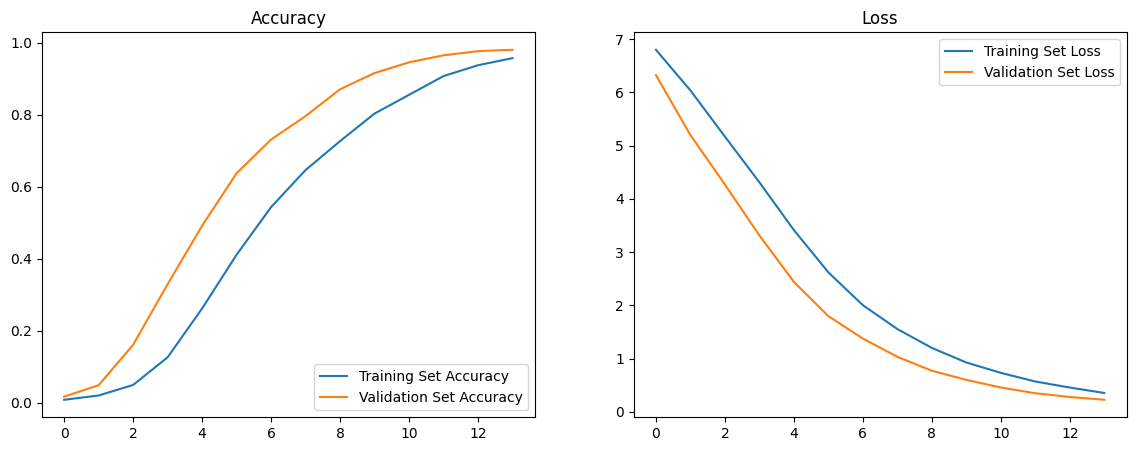

In [20]:
# Plotting model Accuracy and Loss
plt.figure(figsize=(14, 5))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Training Set Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Training Set Loss')
plt.plot(train.history['val_loss'], label='Validation Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')

# Show the plots
plt.show()


#**Testing Chatbot**

In [21]:
# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('👨‍🦰 Kamu : ')

  # Menghapus punktuasi atau tanda baca dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Melakukan Tokenisasi dan Padding pada data teks
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  # Konversi data teks menjadi array
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  # Mendapatkan hasil prediksi keluaran pada model
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag dan memainkan suara bot
  response_tag = le.inverse_transform([output])[0]
  text = random.choice(responses[response_tag])
  print("🤖 Chatbot : ", text)
  # Tambahkan respon 'goodbye' agar bot bisa berhenti melakukan percakapan
  if response_tag == "Goodbye":
    break

👨‍🦰 Kamu : Jelaskan apa yang dimaksud dengan koperasi
1/1 [==============================] - 0s 263ms/step
🤖 Chatbot :  Koperasi adalah badan usaha yang beranggotakan orang nseorang atau badan hukum Koperasi dengan melandaskan nkegiatannya berdasarkan prinsip Koperasi sekaligus nsebagai gerakan ekonomi rakyat yang berdasar atas asas nkekeluargaan.
👨‍🦰 Kamu : Mohon berikan informasi mengenai isi dari UU PP No 7 Tahun 2021 Pasal 68.
1/1 [==============================] - 0s 29ms/step
🤖 Chatbot :  UU PP No 7 Tahun 2021 Pasal 68 Berbunyi (1) Pemerintah Pusat mendorong implementasi pengelolaan
terpadu Usaha Mikro dan Usaha Kecil.
(2) Pengelolaan terpadu Usaha Mikro dan Usaha Kecil
sebagaimana dimaksud pada ayat (1) diimplementasikan
secara bersinergi oleh Pemerintah Pusat, Pemerintah
Daerah, dan pemangku kepentingan terkait melalui
penataan klaster.
👨‍🦰 Kamu : Mengapa target pasar menjadi elemen kritis dalam perencanaan bisnis?
1/1 [==============================] - 0s 46ms/step
🤖 Chatbot :

#**Save The Model**

In [22]:
# Simpan model dalam bentuk format file .h5 atau .pkl (pickle)
model.save('Model_Chatbot.h5')

print('Model Created Successfully!')

Model Created Successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
